In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Input data files are available in the read-only "../dataset/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\sample_submission.csv
dataset\test.csv
dataset\train.csv


In [2]:
train_data=pd.read_csv('dataset/train.csv', header=0)
test_data=pd.read_csv('dataset/test.csv', header=0)

In [3]:
train_data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
test_data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [5]:
train_data.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [8]:
train_data.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [9]:
test_data.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [10]:
train_data['Stall_no'].value_counts()

20.0    165
2.0     152
32.0    146
14.0    145
31.0    144
25.0    142
41.0    138
9.0     137
23.0    136
37.0    135
16.0    135
28.0    134
7.0     133
15.0    133
33.0    132
12.0    132
17.0    132
34.0    131
19.0    130
5.0     129
3.0     129
1.0     128
46.0    127
11.0    126
48.0    126
44.0    126
30.0    126
36.0    126
24.0    126
42.0    124
27.0    124
26.0    123
40.0    123
18.0    123
50.0    122
43.0    122
47.0    121
29.0    120
4.0     120
39.0    120
35.0    119
10.0    118
22.0    117
6.0     117
45.0    116
49.0    111
38.0    111
21.0    109
8.0     106
13.0     96
Name: Stall_no, dtype: int64

In [11]:
train_data['Stall_no'].fillna(20.0, inplace = True) 
test_data['Stall_no'].fillna(20.0, inplace = True)

In [12]:
train_data['Discount_avail'].fillna(0, inplace = True) 
test_data['Discount_avail'].fillna(0, inplace = True)

In [13]:
train_data['charges_1'].fillna(0, inplace = True) 
test_data['charges_1'].fillna(0, inplace = True)

In [14]:
train_data['charges_2 (%)'].fillna(0, inplace = True) 
test_data['charges_2 (%)'].fillna(0, inplace = True)

In [15]:
train_data['Minimum_price'].fillna(0, inplace = True) 
test_data['Minimum_price'].fillna(0, inplace = True)

In [16]:
train_data['Maximum_price'].fillna(0, inplace = True) 
test_data['Maximum_price'].fillna(0, inplace = True)

In [17]:
train_data['Selling_Price'].fillna(0, inplace = True) 
# test_data['Selling_Price'].fillna(0, inplace = True)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6368 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6368 non-null   float64
 10  charges_1         6368 non-null   float64
 11  charges_2 (%)     6368 non-null   float64
 12  Minimum_price     6368 non-null   float64
 13  Maximum_price     6368 non-null   float64
 14  Selling_Price     6368 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [19]:
train_data['Loyalty_customer'].value_counts()

Yes    3887
No     2481
Name: Loyalty_customer, dtype: int64

In [20]:
train_data["Loyalty_customer"].replace({"Yes":1}, inplace=True)
train_data["Loyalty_customer"].replace({"No ":0}, inplace=True)
test_data["Loyalty_customer"].replace({"Yes":1}, inplace=True)
test_data["Loyalty_customer"].replace({"No ":0}, inplace=True)

In [21]:
test_data['Loyalty_customer'].value_counts()

1    2087
0    1343
Name: Loyalty_customer, dtype: int64

In [22]:
train_data["Product_Category"].replace({"Pet_care": 1,"Repair": 2,"Child_care": 3,"Cosmetics": 4,"Hospitality": 5,"Organic": 6,"Technology": 7,"Home_decor": 8,"Educational": 9,"Fashion": 10}, inplace=True)
test_data["Product_Category"].replace({"Pet_care": 1,"Repair": 2,"Child_care": 3,"Cosmetics": 4,"Hospitality": 5,"Organic": 6,"Technology": 7,"Home_decor": 8,"Educational": 9,"Fashion": 10}, inplace=True)

In [23]:
train_data['Product_Category'].value_counts()

1     682
2     676
3     658
4     649
5     632
7     620
6     620
8     617
9     610
10    604
Name: Product_Category, dtype: int64

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6368 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   int64  
 6   Product_Category  6368 non-null   int64  
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6368 non-null   float64
 10  charges_1         6368 non-null   float64
 11  charges_2 (%)     6368 non-null   float64
 12  Minimum_price     6368 non-null   float64
 13  Maximum_price     6368 non-null   float64
 14  Selling_Price     6368 non-null   float64
dtypes: float64(7), int64(5), object(3)
memory usage: 746.4+ KB


In [25]:
numerical_columns=['Stall_no','Market_Category','Grade','Loyalty_customer','Product_Category',
                   'Demand','Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']


caterogical_columns=['Loyalty_customer','Product_Category']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")


from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="most_frequent")),
('std_scaler', StandardScaler()),
])



from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

num_attribs = numerical_columns
cat_attribs = caterogical_columns




full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
train_data_prepared = full_pipeline.fit_transform(train_data)

test_data_prepared = full_pipeline.fit_transform(test_data)

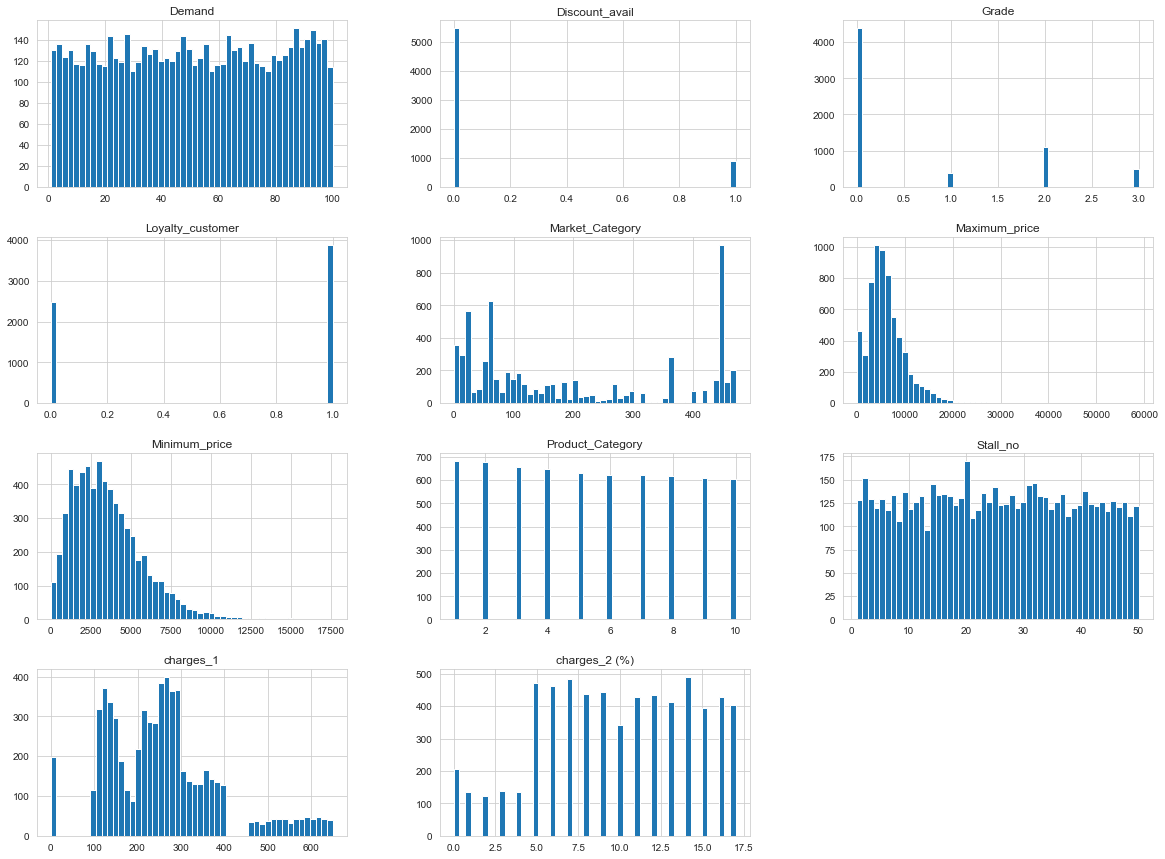

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data[numerical_columns].hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000123DA8C7D90>,
      dtype=object)

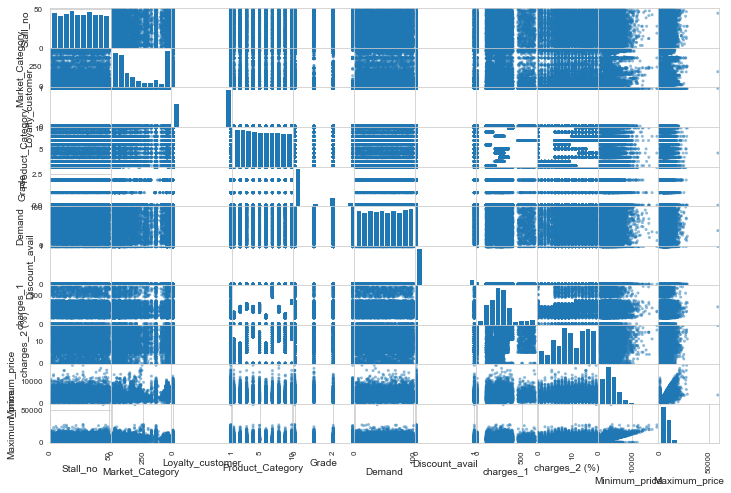

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data[numerical_columns], figsize=(12, 8))

# Create the Correlation Graph

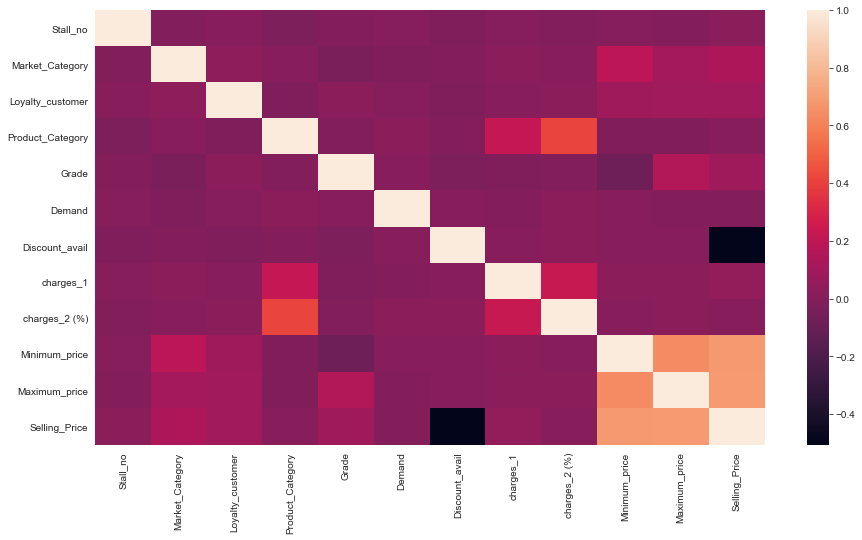

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr())

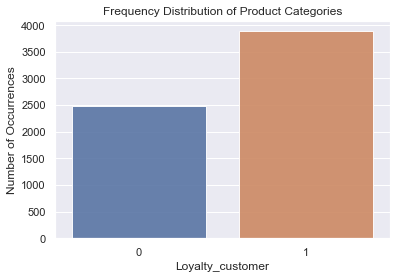

<Figure size 4320x1728 with 0 Axes>

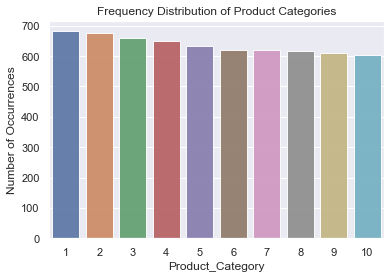

<Figure size 4320x1728 with 0 Axes>

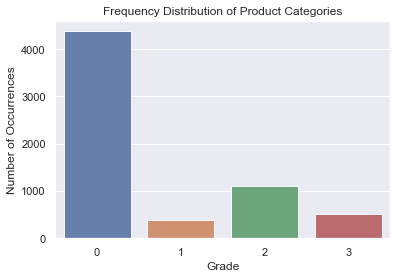

<Figure size 4320x1728 with 0 Axes>

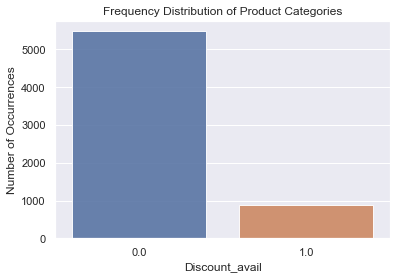

<Figure size 4320x1728 with 0 Axes>

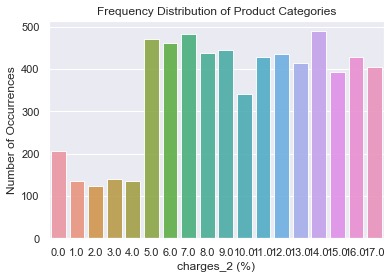

<Figure size 4320x1728 with 0 Axes>

In [31]:
for each in train_data.columns.to_list():
    #print(len(train_data[each].unique()),each)
    if len(train_data[each].unique())<40:
        carrier_count = train_data[each].value_counts()
        sns.set(style="darkgrid")
        sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
        plt.title('Frequency Distribution of Product Categories')
        plt.ylabel('Number of Occurrences', fontsize=12)
        plt.xlabel(each, fontsize=12)
        plt.figure(figsize=(60,24))
        plt.show()

# Trying With XGBOOST

In [43]:
!pip install xgboost
!pip install lightgbm 

In [25]:
valid_fraction = 0.05
valid_size = int(len(train_data) * valid_fraction)

train = train_data_prepared[:-2 * valid_size]
valid = train_data_prepared[-2 * valid_size:-valid_size]
test = train_data_prepared[-valid_size:]


train_l = train_data[:-2 * valid_size]
valid_l = train_data[-2 * valid_size:-valid_size]
test_l = train_data[-valid_size:]

In [27]:
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

# Load the data 

X, y = train_data.iloc[:, :-1], train_data.iloc[:, -1] 
  
# Splitting 
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123) 


xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123)


# Fitting the model 
xgb_r.fit(train_data[numerical_columns], train_data['Selling_Price']) 
  
# Predict the model 
pred = xgb_r.predict(test_data[numerical_columns]) 

# RMSE Computation 
submission = pd.DataFrame({'Product_id':test_data['Product_id'], 'Selling_Price':pred}) 
submission.to_csv('submission.csv', index=False)

[00:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [27]:
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 
  

# Splitting 
train_X, test_X, train_y, test_y = train_test_split(train_data[numerical_columns], train_data['Selling_Price'] ,  
                      test_size = 0.3, random_state = 123) 

# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train_dmatrix = xg.DMatrix(data = train_X, label = train_y) 
test_dmatrix = xg.DMatrix(data = test_X, label = test_y) 
#train_data_prepared, train_data['Selling_Price'] 
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 100) 
pred = xgb_r.predict(test_data[numerical_columns]) 
  
# RMSE Computation 
submission = pd.DataFrame({'Product_id':test_data['Product_id'], 'Selling_Price':pred}) 
submission.to_csv('submission.csv', index=False)

[00:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [26]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter


params = {}
params['learning_rate'] = 0.06
params['max_depth'] = 50
params['n_estimators'] = 500
params['objective'] = 'reg:tweedie'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.6
params['reg_lambda'] = 1.1


# X, y = train_data.iloc[:, :-1], train_data.iloc[:, -1] 
  
# # Splitting 
# train_X, test_X, train_y, test_y = train_test_split(X, y, 
#                       test_size = 0.3, random_state = 123) 



clf = lgb.LGBMClassifier(**params)
clf.fit(train, train_l['Selling_Price'], early_stopping_rounds=100, eval_set=[(valid, valid_l['Selling_Price']),
        (test, test_l['Selling_Price'])],eval_metric='multi_error', verbose=True)

eval_score = accuracy_score(train_data['Selling_Price'], clf.predict(train_data_prepared))

print('Eval ACC: {}'.format(eval_score))

ValueError: Unknown label type: 'continuous'

In [ ]:
pred=clf.predict(train_data[numerical_columns])
submission = pd.DataFrame({'Product_id':test_data['Product_id'], 'Selling_Price':pred}) 
submission.to_csv('submission.csv', index=False)